In [2]:
import tensorflow as tf
import random
import numpy as np
#import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnit=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [16]:
mnit.test.images.shape

(10000, 784)

In [4]:
tf.reset_default_graph()
sess=tf.InteractiveSession()
x=tf.placeholder(tf.float32,shape=[None,28,28,1])
y_=tf.placeholder(tf.float32,shape=[None,10])

In [5]:
W_conv1=tf.Variable(tf.truncated_normal([5,5,1,32],stddev=0.1))
b_conv1=tf.Variable(tf.constant(0.1,shape=[32]))

In [9]:
print (x)
print (W_conv1)
h_conv1=tf.nn.conv2d(x,filter=W_conv1,strides=[1,1,1,1],padding='SAME')
h_conv1=tf.nn.relu(h_conv1)
h_pool1=tf.nn.max_pool(h_conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='SAME')

Tensor("Placeholder:0", shape=(?, 28, 28, 1), dtype=float32)
<tf.Variable 'Variable:0' shape=(5, 5, 1, 32) dtype=float32_ref>


In [10]:
def conv2d(x, W):
  return tf.nn.conv2d(input=x, filter=W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

In [ ]:
tf.reshape()

In [17]:
W_conv2=tf.Variable(tf.truncated_normal([5,5,32,64],stddev=0.1))
b_conv2=tf.Variable(tf.constant(0.1,shape=[64]))
h_conv2=tf.nn.relu(conv2d(h_pool1,W_conv2)+b_conv2)
h_pool2=max_pool_2x2(h_conv2)

#First full connected Layer
W_fc1=tf.Variable(tf.truncated_normal([7*7*64,1024],stddev=0.1))
b_fc1=tf.Variable(tf.constant(0.1,shape=[1024]))
h_pool2_flat=tf.reshape(h_pool2,[-1,7*7*64])
h_fc1=tf.nn.relu(tf.matmul(h_pool2_flat,W_fc1)+b_fc1)

#Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

#Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2







In [18]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))

In [19]:
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)

In [20]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [21]:
sess.run(tf.global_variables_initializer())

In [22]:
tf.summary.scalar('Cross Enropy Loss', crossEntropyLoss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

INFO:tensorflow:Summary name Cross Enropy Loss is illegal; using Cross_Enropy_Loss instead.


INFO:tensorflow:Summary name Cross Enropy Loss is illegal; using Cross_Enropy_Loss instead.


(1, 784)
Tensor("Reshape_4:0", shape=(1, 28, 28, 1), dtype=float32)


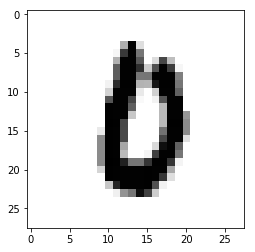

In [25]:
b = mnit.train.next_batch(1)
print (b[0].shape) #b[0] contains the image
image = tf.reshape(b[0], [-1,28,28,1])
print (image)
my_img = image.eval() #here is your image Tensor
my_i = my_img.squeeze()
plt.imshow(my_i, cmap='gray_r')
plt.show()

In [27]:
batchSize = 50
for i in range(1000):
    batch = mnit.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize,28,28,1])
    trainingLabels = batch[1]
    if i%10 == 0:
        summary = sess.run(merged, {x: trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        writer.add_summary(summary, i)
    if i%100 == 0:
        trainAccuracy = accuracy.eval(session=sess, feed_dict={x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print ("step %d, training accuracy %g"%(i, trainAccuracy))
    trainStep.run(session=sess, feed_dict={x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 0, training accuracy 0.16
step 100, training accuracy 0.92
step 200, training accuracy 1
step 300, training accuracy 0.98
step 400, training accuracy 0.94
step 500, training accuracy 1
step 600, training accuracy 1
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 1
